In [1]:
import pandas as pd
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
from scipy.stats import kstest
from scipy.stats import mannwhitneyu
from scipy import stats

In [2]:
correlation_output_df = pd.read_excel('outputs\\correlation_matrix_with_income_groups.xlsx')
correlation_output_df = correlation_output_df.drop(columns=['Unnamed: 0'])
correlation_output_df = correlation_output_df.rename(columns={"World Bank's income classification": 'Income Group'})
correlation_output_df = correlation_output_df.dropna(subset=['Income Group'])
correlation_output_df = correlation_output_df.dropna(subset=['Values'])

display(correlation_output_df)

,Variable 1,Variable 2,Values,Code,Entity,Income Group
0,CO2,Lawindex,0.962016,CIV,Cote d'Ivoire,Lower-middle-income countries
1,Lawindex,CO2,0.962016,CIV,Cote d'Ivoire,Lower-middle-income countries
2,Politicalstab,Lawindex,0.961653,MLI,Mali,Low-income countries
3,Lawindex,Politicalstab,0.961653,MLI,Mali,Low-income countries
4,Ginindex,CO2,0.959129,STP,Sao Tome and Principe,Lower-middle-income countries
...,...,...,...,...,...,...
3115,Ginindex,CO2,-0.977708,NAM,Namibia,Upper-middle-income countries
3116,CO2,Ginindex,-0.982794,SYC,Seychelles,High-income countries
3117,Ginindex,CO2,-0.982794,SYC,Seychelles,High-income countries
3118,Ginindex,Lawindex,-0.983311,RWA,Rwanda,Low-income countries


In [3]:
co2_gdp = correlation_output_df.query("`Variable 1` == 'CO2' and `Variable 2` == 'Gdp'")
co2_law = correlation_output_df.query("`Variable 1` == 'CO2' and `Variable 2` == 'Lawindex'")
co2_gini = correlation_output_df.query("`Variable 1` == 'CO2' and `Variable 2` == 'Ginindex'")
co2_politicstab = correlation_output_df.query("`Variable 1` == 'CO2' and `Variable 2` == 'Politicalstab'")

gdp_law = correlation_output_df.query("`Variable 1` == 'Gdp' and `Variable 2` == 'Lawindex'")
gdp_gini = correlation_output_df.query("`Variable 1` == 'Gdp' and `Variable 2` == 'Ginindex'")
gdp_politicstab = correlation_output_df.query("`Variable 1` == 'Gdp' and `Variable 2` == 'Politicalstab'")

law_gini = correlation_output_df.query("`Variable 1` == 'Lawindex' and `Variable 2` == 'Ginindex'")
law_politicstab = correlation_output_df.query("`Variable 1` == 'Lawindex' and `Variable 2` == 'Politicalstab'")

gini_politicstab = correlation_output_df.query("`Variable 1` == 'Ginindex' and `Variable 2` == 'Politicalstab'")

co2_gdp.name = 'CO2-GDP'
co2_law.name = 'CO2-Lawindex'
co2_gini.name = 'CO2-Ginindex'
co2_politicstab.name = 'CO2-Politicalstab'

gdp_law.name = 'Gdp-Lawindex'
gdp_gini.name = 'Gdp-Ginindex'
gdp_politicstab.name = 'Gdp-Politicalstab'

law_gini.name = 'Lawindex-Ginindex'
law_politicstab.name = 'Lawindex-Politicalstab'

gini_politicstab.name = 'Ginindex-Politicalstab'

#display(len(co2_politicstab))
#display(co2_gini.name)

In [4]:
from scipy.stats import mannwhitneyu
from itertools import combinations

def perform_mann_whitney_u_tests(df):
    # Group by income group
    grouped = df.groupby('Income Group')['Values']
    
    # Calculate Mann-Whitney U tests for all possible combinations
    mwu_test_results = {}
    for group1, group2 in combinations(grouped, 2):
        u_statistic, p_value = mannwhitneyu(group1[1], group2[1], alternative='two-sided')  # Two-sided test
        mwu_test_results[f'{group1[0]} vs. {group2[0]}'] = {'u_statistic': u_statistic, 'p_value': p_value}
    
    return mwu_test_results

In [5]:
import pandas as pd
import scipy.stats as stats
from itertools import combinations

# Function to perform t-tests on a DataFrame
def perform_t_tests(df):
    # Group by income group
    grouped = df.groupby('Income Group')['Values']
    
    # Calculate t-tests for all possible combinations
    t_test_results = {}
    for group1, group2 in combinations(grouped, 2):
        t_statistic, p_value = stats.ttest_ind(group1[1], group2[1], equal_var=False)  # Assuming unequal variances
        t_test_results[f'{group1[0]} vs. {group2[0]}'] = {'t_statistic': t_statistic, 'p_value': p_value}
    
    return t_test_results

In [6]:
tables = [co2_gdp, co2_law, co2_gini, co2_politicstab, gdp_law, gdp_gini, gdp_politicstab, law_gini, law_politicstab, gini_politicstab]
table_names = ['CO2-GDP', 'CO2-Lawindex', 'CO2-Ginindex', 'CO2-Politicalstab', 'Gdp-Lawindex', 'Gdp-Ginindex', 'Gdp-Politicalstab', 'Lawindex-Ginindex', 'Lawindex-Politicalstab', 'Ginindex-Politicalstab']
# Apply the function to each DataFrame
all_results = [perform_t_tests(df) for df in tables]

# Print the results for each table
for index, results in enumerate(all_results):
    print(f'Results for Table {table_names[index]}:')
    for comparison, stats in results.items():
        print(f'{comparison}: t-statistic = {stats["t_statistic"]}, p-value = {stats["p_value"]}')
    print()  # New line for better readability


data_values = []
for index, results in enumerate(all_results):
    for comparison, stats in results.items():
        data_values.append({
            'Table Name': table_names[index],
            'Comparison': comparison,
            't-statistic': stats['t_statistic'],
            'p-value': stats['p_value']
        })

# Create a DataFrame from the list of data
finale = pd.DataFrame(data_values)

sorted_df = finale.sort_values(by='p-value')

# Display the DataFrame
display(sorted_df)

sorted_df = finale.sort_values(by='t-statistic')
display(sorted_df)

sorted_df.to_excel('outputs\\students_t.xlsx')

Results for Table CO2-GDP:
High-income countries vs. Low-income countries: t-statistic = 0.0399084222930555, p-value = 0.9683420080781588
High-income countries vs. Lower-middle-income countries: t-statistic = 1.5354933920282128, p-value = 0.12817860959312075
High-income countries vs. Upper-middle-income countries: t-statistic = -2.6983049289150505, p-value = 0.008555777420043702
Low-income countries vs. Lower-middle-income countries: t-statistic = 1.2719256560061656, p-value = 0.20918554147038468
Low-income countries vs. Upper-middle-income countries: t-statistic = -2.413485531331186, p-value = 0.018951968017235782
Lower-middle-income countries vs. Upper-middle-income countries: t-statistic = -3.9170673685365167, p-value = 0.00017898357860945832

Results for Table CO2-Lawindex:
High-income countries vs. Low-income countries: t-statistic = 0.3595048572659169, p-value = 0.7212296946006806
High-income countries vs. Lower-middle-income countries: t-statistic = 0.8669788859201331, p-value =

,Table Name,Comparison,t-statistic,p-value
5,CO2-GDP,Lower-middle-income countries vs. Upper-middle...,-3.917067,0.000179
14,CO2-Ginindex,High-income countries vs. Upper-middle-income ...,3.104382,0.002674
47,Lawindex-Ginindex,Lower-middle-income countries vs. Upper-middle...,3.019114,0.003332
45,Lawindex-Ginindex,Low-income countries vs. Lower-middle-income c...,-2.876639,0.006740
2,CO2-GDP,High-income countries vs. Upper-middle-income ...,-2.698305,0.008556
4,CO2-GDP,Low-income countries vs. Upper-middle-income c...,-2.413486,0.018952
43,Lawindex-Ginindex,High-income countries vs. Lower-middle-income ...,-2.359029,0.020593
48,Lawindex-Politicalstab,High-income countries vs. Low-income countries,-2.110100,0.040668
57,Ginindex-Politicalstab,Low-income countries vs. Lower-middle-income c...,-2.044334,0.047217
51,Lawindex-Politicalstab,Low-income countries vs. Lower-middle-income c...,2.041133,0.048114


,Table Name,Comparison,t-statistic,p-value
5,CO2-GDP,Lower-middle-income countries vs. Upper-middle...,-3.917067,0.000179
45,Lawindex-Ginindex,Low-income countries vs. Lower-middle-income c...,-2.876639,0.006740
2,CO2-GDP,High-income countries vs. Upper-middle-income ...,-2.698305,0.008556
4,CO2-GDP,Low-income countries vs. Upper-middle-income c...,-2.413486,0.018952
43,Lawindex-Ginindex,High-income countries vs. Lower-middle-income ...,-2.359029,0.020593
48,Lawindex-Politicalstab,High-income countries vs. Low-income countries,-2.110100,0.040668
57,Ginindex-Politicalstab,Low-income countries vs. Lower-middle-income c...,-2.044334,0.047217
58,Ginindex-Politicalstab,Low-income countries vs. Upper-middle-income c...,-1.420293,0.162719
29,Gdp-Lawindex,Lower-middle-income countries vs. Upper-middle...,-1.319939,0.190091
21,CO2-Politicalstab,Low-income countries vs. Lower-middle-income c...,-0.957065,0.344486


In [10]:
tables = [co2_gdp, co2_law, co2_gini, co2_politicstab, gdp_law, gdp_gini, gdp_politicstab, law_gini, law_politicstab, gini_politicstab]
display(co2_gdp)

table_names = ['CO2-GDP', 'CO2-Lawindex', 'CO2-Ginindex', 'CO2-Politicalstab', 'Gdp-Lawindex', 'Gdp-Ginindex', 'Gdp-Politicalstab', 'Lawindex-Ginindex', 'Lawindex-Politicalstab', 'Ginindex-Politicalstab']


# Apply the function to each DataFrame
all_results_mann_whitney_u = [perform_mann_whitney_u_tests(df) for df in tables]

# Print the results for each table
for index, results in enumerate(all_results_mann_whitney_u):
    print(f'Results for Table {table_names[index]}:')
    for comparison, stats in results.items():
        print(f'{comparison}: u-statistic = {stats["u_statistic"]}, p-value = {stats["p_value"]}')
    print()  # New line for better readability


data_values_u = []
for index, results in enumerate(all_results_mann_whitney_u):
    for comparison, stats in results.items():
        data_values_u.append({
            'Table Name': table_names[index],
            'Comparison': comparison,
            'u-statistic': stats['u_statistic'],
            'p-value': stats['p_value']
        })

# Create a DataFrame from the list of data
finale_mannu = pd.DataFrame(data_values_u)

sorted_df_mannu = finale_mannu.sort_values(by='p-value')

# Display the DataFrame
display(sorted_df_mannu)



# Assuming 'df' is your DataFrame and it contains 'u-statistic' and 'p-values' columns
# sorted_df_mannu = sorted_df_mannu[sorted_df_mannu['p-value'] < 1].sort_values('u-statistic', ascending=False)

# This will display the filtered and ranked DataFrame
display(sorted_df_mannu)


sorted_df_mannu.to_excel('outputs\\mann_whitney_u.xlsx')

,Variable 1,Variable 2,Values,Code,Entity,Income Group
14,CO2,Gdp,0.938133,LBN,Lebanon,Upper-middle-income countries
168,CO2,Gdp,0.788473,BLR,Belarus,Upper-middle-income countries
261,CO2,Gdp,0.691277,ARG,Argentina,Upper-middle-income countries
273,CO2,Gdp,0.684927,KAZ,Kazakhstan,Upper-middle-income countries
280,CO2,Gdp,0.681365,SLB,Solomon Islands,Lower-middle-income countries
...,...,...,...,...,...,...
2578,CO2,Gdp,-0.456326,UZB,Uzbekistan,Lower-middle-income countries
2590,CO2,Gdp,-0.462427,ISR,Israel,High-income countries
2619,CO2,Gdp,-0.477524,SWZ,Eswatini,Lower-middle-income countries
2627,CO2,Gdp,-0.486302,NRU,Nauru,High-income countries


Results for Table CO2-GDP:
High-income countries vs. Low-income countries: u-statistic = 491.0, p-value = 0.6632589140828204
High-income countries vs. Lower-middle-income countries: u-statistic = 1293.0, p-value = 0.046729476165860526
High-income countries vs. Upper-middle-income countries: u-statistic = 670.0, p-value = 0.06061019872954172
Low-income countries vs. Lower-middle-income countries: u-statistic = 695.0, p-value = 0.267524916641235
Low-income countries vs. Upper-middle-income countries: u-statistic = 361.0, p-value = 0.056371124599831866
Lower-middle-income countries vs. Upper-middle-income countries: u-statistic = 669.0, p-value = 0.0004846564206480375

Results for Table CO2-Lawindex:
High-income countries vs. Low-income countries: u-statistic = 474.0, p-value = 0.8471734964873834
High-income countries vs. Lower-middle-income countries: u-statistic = 1146.0, p-value = 0.40600722785620114
High-income countries vs. Upper-middle-income countries: u-statistic = 870.0, p-value 

,Table Name,Comparison,u-statistic,p-value
5,CO2-GDP,Lower-middle-income countries vs. Upper-middle...,669.0,0.000485
47,Lawindex-Ginindex,Lower-middle-income countries vs. Upper-middle...,1338.0,0.003192
14,CO2-Ginindex,High-income countries vs. Upper-middle-income ...,1077.0,0.003644
45,Lawindex-Ginindex,Low-income countries vs. Lower-middle-income c...,298.0,0.005636
48,Lawindex-Politicalstab,High-income countries vs. Low-income countries,266.0,0.005738
51,Lawindex-Politicalstab,Low-income countries vs. Lower-middle-income c...,809.0,0.015579
43,Lawindex-Ginindex,High-income countries vs. Lower-middle-income ...,688.0,0.024914
52,Lawindex-Politicalstab,Low-income countries vs. Upper-middle-income c...,675.0,0.026076
1,CO2-GDP,High-income countries vs. Lower-middle-income ...,1293.0,0.046729
4,CO2-GDP,Low-income countries vs. Upper-middle-income c...,361.0,0.056371


,Table Name,Comparison,u-statistic,p-value
5,CO2-GDP,Lower-middle-income countries vs. Upper-middle...,669.0,0.000485
47,Lawindex-Ginindex,Lower-middle-income countries vs. Upper-middle...,1338.0,0.003192
14,CO2-Ginindex,High-income countries vs. Upper-middle-income ...,1077.0,0.003644
45,Lawindex-Ginindex,Low-income countries vs. Lower-middle-income c...,298.0,0.005636
48,Lawindex-Politicalstab,High-income countries vs. Low-income countries,266.0,0.005738
51,Lawindex-Politicalstab,Low-income countries vs. Lower-middle-income c...,809.0,0.015579
43,Lawindex-Ginindex,High-income countries vs. Lower-middle-income ...,688.0,0.024914
52,Lawindex-Politicalstab,Low-income countries vs. Upper-middle-income c...,675.0,0.026076
1,CO2-GDP,High-income countries vs. Lower-middle-income ...,1293.0,0.046729
4,CO2-GDP,Low-income countries vs. Upper-middle-income c...,361.0,0.056371


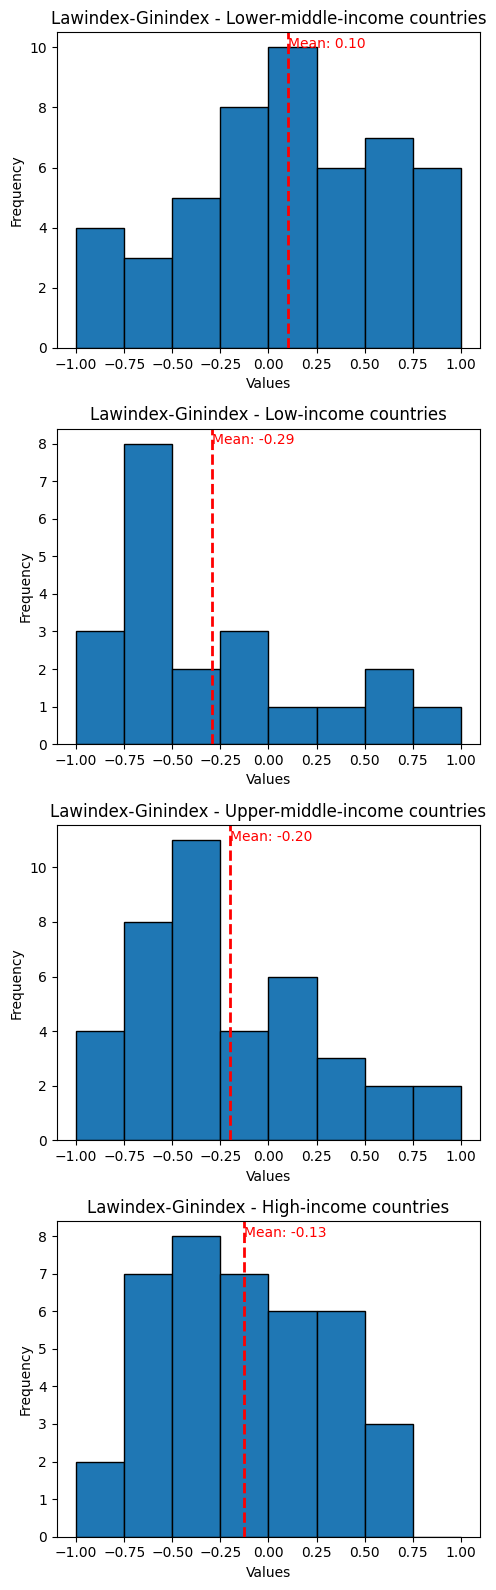

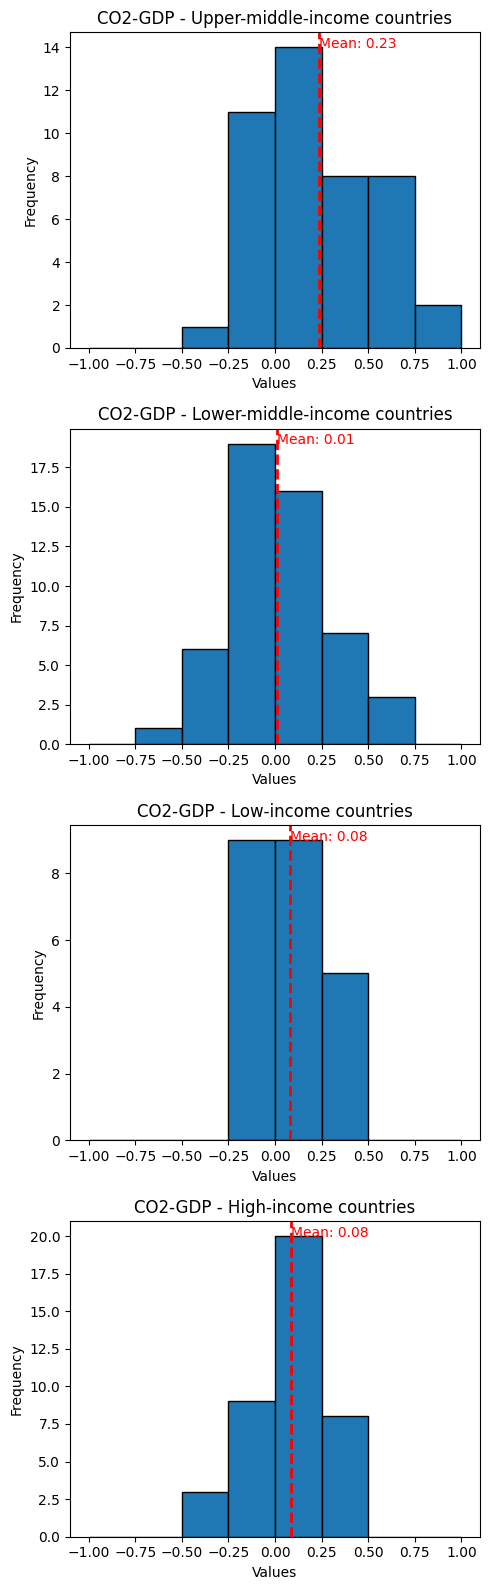

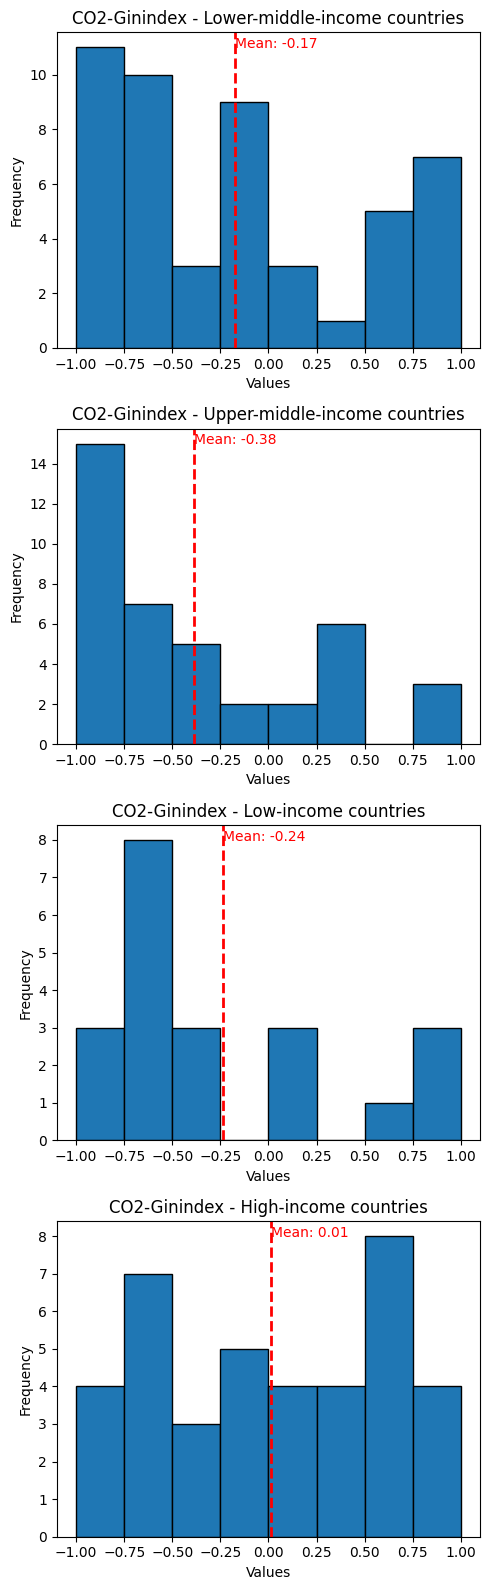

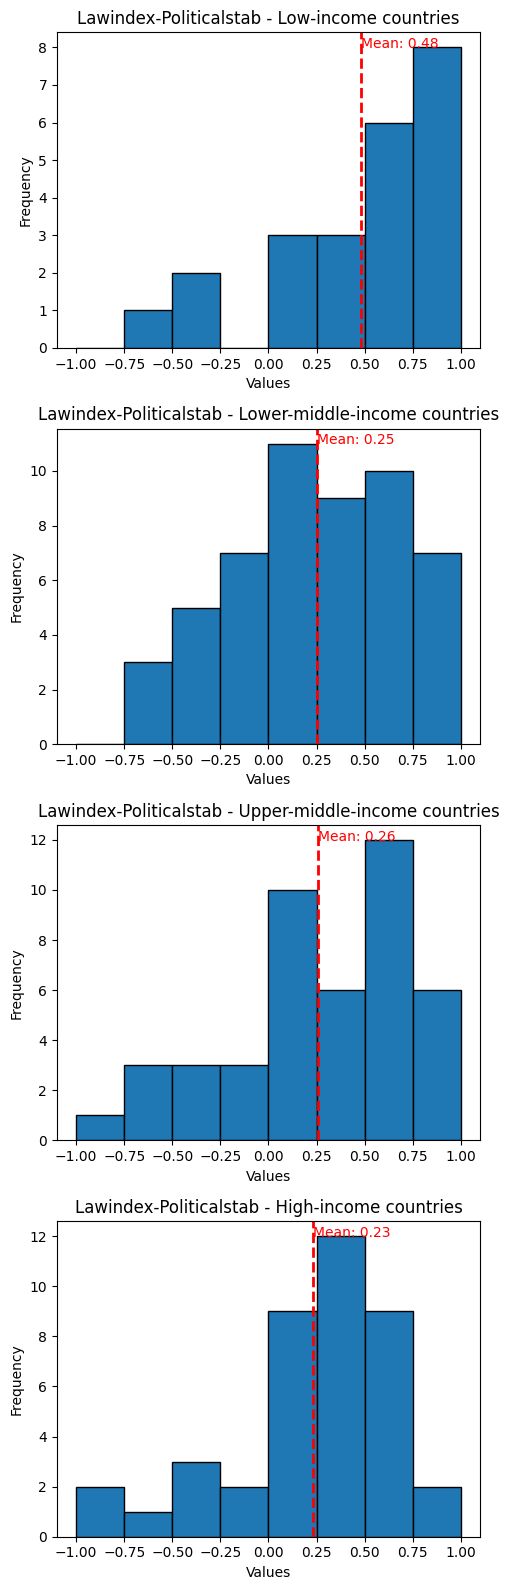

In [ ]:
import matplotlib.pyplot as plt

tables_for_result_visualisations = [law_gini, co2_gdp,co2_gini, law_politicstab]
tables_for_result_visualisations_names = ['Lawindex-Ginindex', 'CO2-GDP', 'CO2-Ginindex', 'Lawindex-Politicalstab']


# 'visualisations_dict' is a dictionary mapping names to dataframes
visualisations_dict = dict(zip(tables_for_result_visualisations_names, tables_for_result_visualisations))

# Loop through the dictionary items
for name, df in visualisations_dict.items():
    # Get the unique income groups
    income_groups = df['Income Group'].unique()
    # Determine the number of income groups
    n_groups = len(income_groups)
    
    # Create a subplot for each income group
    fig, axs = plt.subplots(n_groups, 1, figsize=(5, n_groups * 4))
    
    # If there is only one income group, axs will not be an array, so we make it one for consistency
    if n_groups == 1:
        axs = [axs]
    
    # Loop through each income group and its corresponding axis
    for ax, income_group in zip(axs, income_groups):
        # Select the data for the current income group
        group_data = df[df['Income Group'] == income_group]
        # Calculate the mean value
        mean_value = group_data['Values'].mean()
        # Plot the histogram on the corresponding subplot axis
        ax.hist(group_data['Values'], bins=8, range=(-1, 1), edgecolor='black')
        # Add the mean value as a vertical line
        ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)
        # Annotate the mean value on the plot
        ax.text(mean_value, ax.get_ylim()[1] * 0.95, f'Mean: {mean_value:.2f}', color='red')
        # Set the title, xlabel, and ylabel
        ax.set_title(f'{name} - {income_group}')
        ax.set_xlabel('Values')
        ax.set_ylabel('Frequency')
    
    # Adjust the layout so that the subplots do not overlap
    plt.tight_layout()
    # Show the plot
    plt.show()



In [ ]:
def autokstester(pair_df):
    # Assuming 'co2_gini' is your DataFrame with the given structure

    # First, let's group the DataFrame by 'Income Group'
    groups = pair_df.groupby('Income Group')

    # Now, we'll apply the K-S test to the 'Values' column of each group
    ks_results = {}

    for name, group in groups:
        # Perform the K-S test comparing the group's 'Values' distribution to a normal distribution
        ks_statistic, p_value = kstest(group['Values'], 'norm')

        # Store the results in a dictionary
        ks_results[name] = {'KS Statistic': ks_statistic, 'P-Value': p_value}

    # Convert the results dictionary to a DataFrame for better visualization
    ks_results_df = pd.DataFrame(ks_results).T

    ks_results_df.name = pair_df.name
    return ks_results_df

In [ ]:
kstested_gdp_cow = autokstester(co2_gdp)
kstested_law_cow = autokstester(co2_law)
kstested_gini_cow = autokstester(co2_gini)
kstested_politicstab_cow = autokstester(co2_politicstab)

kstested_gdp_law = autokstester(gdp_law)
kstested_gdp_gini = autokstester(gdp_gini)
kstested_gdp_politicstab = autokstester(gdp_politicstab)

kstested_law_gini = autokstester(law_gini)
kstested_law_politicstab = autokstester(law_politicstab)

kstested_gini_politicstab = autokstester(gini_politicstab)

display(kstested_gdp_cow.name, kstested_gdp_cow)
display(kstested_law_cow.name, kstested_law_cow)
display(kstested_gini_cow.name, kstested_gini_cow)
display(kstested_politicstab_cow.name, kstested_politicstab_cow)

display(kstested_gdp_law.name, kstested_gdp_law)
display(kstested_gdp_gini.name, kstested_gdp_gini)
display(kstested_gdp_politicstab.name, kstested_gdp_politicstab)

display(kstested_law_gini.name, kstested_law_gini)
display(kstested_law_politicstab.name, kstested_law_politicstab)

display(kstested_gini_politicstab.name, kstested_gini_politicstab)

'CO2-GDP'

,KS Statistic,P-Value
High-income countries,0.362635,3.210961e-05
Low-income countries,0.405367,6.288754e-04
Lower-middle-income countries,0.311121,5.714332e-05
Upper-middle-income countries,0.400727,6.858573e-07


'CO2-Lawindex'

,KS Statistic,P-Value
High-income countries,0.202319,0.065245
Low-income countries,0.182596,0.380771
Lower-middle-income countries,0.202617,0.023894
Upper-middle-income countries,0.208514,0.037197


'CO2-Ginindex'

,KS Statistic,P-Value
High-income countries,0.200648,0.074824
Low-income countries,0.295807,0.040048
Lower-middle-income countries,0.193360,0.044374
Upper-middle-income countries,0.319270,0.000398


'CO2-Politicalstab'

,KS Statistic,P-Value
High-income countries,0.286842,0.002086
Low-income countries,0.196149,0.298450
Lower-middle-income countries,0.171636,0.082666
Upper-middle-income countries,0.235034,0.012737


'Gdp-Lawindex'

,KS Statistic,P-Value
High-income countries,0.326328,0.000271
Low-income countries,0.383677,0.001482
Lower-middle-income countries,0.291817,0.000204
Upper-middle-income countries,0.324388,0.000127


'Gdp-Ginindex'

,KS Statistic,P-Value
High-income countries,0.291908,0.001941
Low-income countries,0.272314,0.072420
Lower-middle-income countries,0.345417,0.000010
Upper-middle-income countries,0.316978,0.000451


'Gdp-Politicalstab'

,KS Statistic,P-Value
High-income countries,0.303483,0.000914
Low-income countries,0.357950,0.003822
Lower-middle-income countries,0.296097,0.000155
Upper-middle-income countries,0.279252,0.001585


'Lawindex-Ginindex'

,KS Statistic,P-Value
High-income countries,0.280248,0.003350
Low-income countries,0.273990,0.069540
Lower-middle-income countries,0.221294,0.013750
Upper-middle-income countries,0.259757,0.007198


'Lawindex-Politicalstab'

,KS Statistic,P-Value
High-income countries,0.314834,0.000505
Low-income countries,0.410854,0.000502
Lower-middle-income countries,0.296658,0.000149
Upper-middle-income countries,0.302445,0.000456


'Ginindex-Politicalstab'

,KS Statistic,P-Value
High-income countries,0.234274,0.022939
Low-income countries,0.255704,0.106738
Lower-middle-income countries,0.210420,0.022117
Upper-middle-income countries,0.216096,0.040483


In [ ]:
co2_law_lowincome = co2_law.query("`Income Group` == 'Low-income countries'")
co2_law_highincome = co2_law.query("`Income Group` == 'High-income countries'")

from scipy import stats
import numpy as np

# Sample data
data1 = co2_law_lowincome['Values']
data2 = co2_law_highincome['Values']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(data1, data2)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')



T-statistic: -0.38410487013877165
P-value: 0.7022364222340824


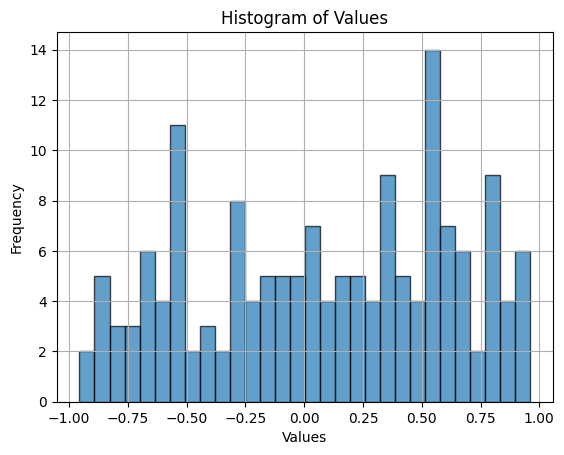

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot a histogram for the 'values' column
plt.hist(co2_law['Values'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

# Let's assume you have two DataFrames named df1 and df2
# and each has a column named 'Values' that you want to compare.

# Extract the 'Values' column from each DataFrame
values_df1 = co2_law_lowincome['Values']
values_df2 = co2_law_highincome['Values']

# Perform the Mann-Whitney U test
U_statistic, p_value = mannwhitneyu(values_df1, values_df2)

print(f'U-statistic: {U_statistic}')
print(f'P-value: {p_value}')

U-statistic: 446.0
P-value: 0.8471734964873834
